In [1]:
import yaml
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from npgamma import calc_gamma

In [2]:
with open('data_unequal_grid.yml', 'r') as file:
    data = yaml.load(file)
    
x_reference = data['x_mephisto']
y_reference = data['d_mephisto']
dose_reference = data['mephisto_dose_grid']

x_evaluation = data['x_monaco']
y_evaluation = data['d_monaco']
dose_evaluation = data['monaco_dose_grid']

coords_reference = (y_reference, x_reference)
coords_evaluation = (y_evaluation, x_evaluation)

In [3]:
distance_threshold = 2
distance_step_size = distance_threshold / 10

dose_threshold = 0.02 * np.max(dose_evaluation)

lower_dose_cutoff = np.max(dose_evaluation) * 0.2

In [4]:
gamma = calc_gamma(
    coords_reference, dose_reference,
    coords_evaluation, dose_evaluation,
    distance_threshold, dose_threshold,
    lower_dose_cutoff=lower_dose_cutoff, 
    distance_step_size=distance_step_size,
    maximum_test_distance=np.inf)

(0, 2)

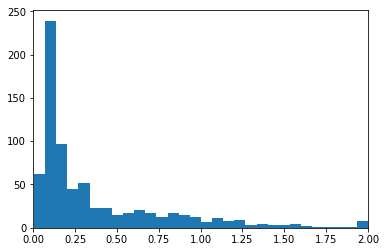

In [5]:
valid_gamma = gamma[~np.isnan(gamma)]
valid_gamma[valid_gamma > 2] = 2

plt.hist(valid_gamma, 30);
plt.xlim([0,2])

In [6]:
np.sum(valid_gamma <= 1) / len(valid_gamma)

0.91008174386920981

Text(0,0.5,'depth (mm)')

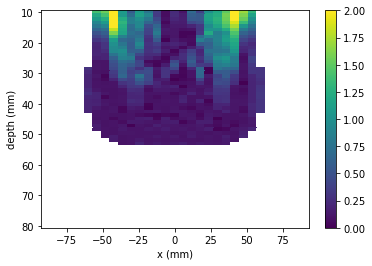

In [7]:
dx = x_evaluation[1] - x_evaluation[0]
x_pcolor = np.arange(x_evaluation[0]-dx/2, x_evaluation[-1] + dx, dx)

dy = y_evaluation[1] - y_evaluation[0]
y_pcolor = np.arange(y_evaluation[0]-dy/2, y_evaluation[-1] + dy, dy)

cut_off_gamma = np.ma.array (gamma, mask=np.isnan(gamma))
cmap = cm.viridis
cmap.set_bad('white',1.)

plt.pcolormesh(
    x_pcolor, y_pcolor, cut_off_gamma, cmap=cmap, vmin=0, vmax=2)

plt.gca().invert_yaxis()
plt.colorbar()

plt.xlabel('x (mm)')
plt.ylabel('depth (mm)')